<a href="https://colab.research.google.com/github/melon2560/python-projects/blob/main/20241201Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
df = pd.read_csv('titanic3.csv')
print(df.info())
print(df.describe())
# 欠損値を埋める、列を加工する
df['age'] = df['age'].fillna(df['age'].median())
df['fare_category'] = pd.cut(df['fare'], bins=[0, 20, 40, 100], labels=['Low', 'Medium', 'High'])
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None
            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    2

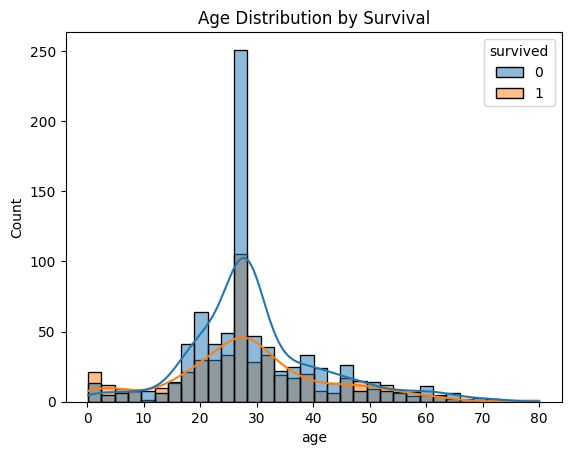

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data=df, x='age', hue='survived', kde=True)
plt.title('Age Distribution by Survival')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())

X = df[['age', 'fare', 'pclass']]
X = pd.get_dummies(X, drop_first=True)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LogisticRegression()
rf_model = RandomForestClassifier()

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.63      0.92      0.75       144
           1       0.78      0.36      0.49       118

    accuracy                           0.66       262
   macro avg       0.71      0.64      0.62       262
weighted avg       0.70      0.66      0.63       262

Random Forest:
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       144
           1       0.72      0.49      0.59       118

    accuracy                           0.69       262
   macro avg       0.70      0.67      0.67       262
weighted avg       0.69      0.69      0.68       262

